In [2]:
# Librerías de análisis de datos
import numpy as np
import pandas as pd

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('london_airbnb.csv')
#df.head()

In [5]:
#df.columns

In [6]:
#Información sobre el dataset
#df.info()

In [7]:
# Agrupamos los distritos para poder observar cuántas entradas hay.
#df_groupCount = df.groupby('room_type').count()
#df_groupCount

In [8]:
#Cuanto de cada tipo hay

#print(df['neighbourhood'].value_counts())

In [9]:
#Revisando duplicados:
df.duplicated().sum()

0

In [10]:
#Reemplazando los valores NaN de 'last_reviews' por una nueva categoría llamada 'No Reviews'.
#df['last_review'].fillna('No Reviews', inplace=True)

In [11]:
#Conteo de datos faltantes por columna. 
df.isnull().sum(axis = 0)

#Promedio de review per month
promedio = df['reviews_per_month'].mean()
promedioprice = df['price'].mean()
df['reviews_per_month'].fillna(promedio, inplace=True)
df['price'] = df['price'].replace([0], promedioprice)



In [12]:
df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [13]:
#df.duplicated().sum()

In [14]:
# Comprobando los cambios realizados
df.isnull().sum()

id                                    0
name                                 25
host_id                               0
host_name                            12
neighbourhood_group               85068
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20006
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df = df.drop(columns=['neighbourhood_group','id','last_review','name','host_id','host_name','latitude','longitude'])
#df.drop(['id','host_id', 'name','neighbourhood', 'host_name','last_review','calculated_host_listings_count' ], axis=1, inplace=True)

#calculo el promedio de precio
promedio = df['price'].mean()

#imputacion de datos por el promedio
df['reviews_per_month'].fillna(promedio, inplace=True)

#TODO: corte de outlinear
df = df[df['price'] < 5000]

# Muestra datos
#df.head()

In [16]:
#Analizando la tabla con los nuevos valores
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85017.000000,85017.000000,85017.000000,85017.000000,85017.000000,85017.00000
mean,118.381783,4.117729,17.476681,1.202116,22.158415,118.40159
std,144.269374,15.835144,36.795348,1.227017,110.687070,134.80926
min,1.000000,1.000000,0.000000,0.010000,1.000000,0.00000
25%,47.000000,1.000000,1.000000,0.360000,1.000000,0.00000
50%,84.000000,2.000000,4.000000,1.160000,1.000000,58.00000
75%,140.000000,3.000000,17.000000,1.240000,5.000000,244.00000
max,4750.000000,1125.000000,716.000000,20.130000,999.000000,365.00000


In [17]:
df.corr()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.020047,-0.095453,-0.043382,0.175984,0.123955
minimum_nights,0.020047,1.000000,-0.031721,-0.053836,-0.016907,0.038983
number_of_reviews,-0.095453,-0.031721,1.000000,0.537740,-0.058423,0.122587
reviews_per_month,-0.043382,-0.053836,0.537740,1.000000,-0.035256,0.116269
calculated_host_listings_count,0.175984,-0.016907,-0.058423,-0.035256,1.000000,-0.048338
availability_365,0.123955,0.038983,0.122587,0.116269,-0.048338,1.000000


In [18]:
X = df.drop('price', axis=1)
y = df['price']


In [19]:
# solo 5
df.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,Entire home/apt,88.0,3,185,1.58,2,336
1,Islington,Private room,65.0,1,19,0.17,2,365
2,Kensington and Chelsea,Entire home/apt,105.0,2,339,3.33,2,268
3,Kensington and Chelsea,Entire home/apt,100.0,30,88,0.73,1,158
4,Islington,Private room,77.0,1,207,2.04,2,336


In [20]:
X.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,Entire home/apt,3,185,1.58,2,336
1,Islington,Private room,1,19,0.17,2,365
2,Kensington and Chelsea,Entire home/apt,2,339,3.33,2,268
3,Kensington and Chelsea,Entire home/apt,30,88,0.73,1,158
4,Islington,Private room,1,207,2.04,2,336


In [21]:
y.head()

0     88.0
1     65.0
2    105.0
3    100.0
4     77.0
Name: price, dtype: float64

In [22]:
#Identificación de variables de la nueva tabla 'df':

categoricas = ['neighbourhood', 'room_type']
numericas = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

<AxesSubplot:>

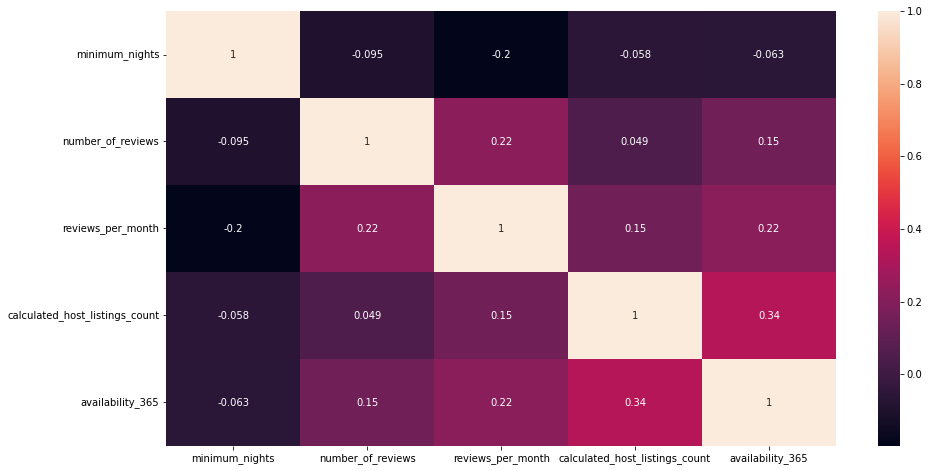

In [23]:
#Mapa de calor de las variables numéricas asimetrica.
corr = df[numericas].corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [24]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ('transformer_numerico', MinMaxScaler(), numericas)
transformer_categorico = ('transformer_categorico', OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico])

In [25]:
X = transformer.fit_transform(X).toarray()

In [26]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

,transformer_numerico__minimum_nights,transformer_numerico__number_of_reviews,transformer_numerico__reviews_per_month,transformer_numerico__calculated_host_listings_count,transformer_numerico__availability_365,transformer_categorico__neighbourhood_Barking and Dagenham,transformer_categorico__neighbourhood_Barnet,transformer_categorico__neighbourhood_Bexley,transformer_categorico__neighbourhood_Brent,transformer_categorico__neighbourhood_Bromley,...,transformer_categorico__neighbourhood_Southwark,transformer_categorico__neighbourhood_Sutton,transformer_categorico__neighbourhood_Tower Hamlets,transformer_categorico__neighbourhood_Waltham Forest,transformer_categorico__neighbourhood_Wandsworth,transformer_categorico__neighbourhood_Westminster,transformer_categorico__room_type_Entire home/apt,transformer_categorico__room_type_Hotel room,transformer_categorico__room_type_Private room,transformer_categorico__room_type_Shared room
0,0.001779,0.258380,0.078032,0.001002,0.920548,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.026536,0.007952,0.001002,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000890,0.473464,0.165010,0.001002,0.734247,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.025801,0.122905,0.035785,0.000000,0.432877,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.289106,0.100895,0.001002,0.920548,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85012,0.001779,0.002793,0.098907,0.000000,0.161644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
85013,0.000890,0.000000,0.059244,0.001002,0.309589,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85014,0.001779,0.000000,0.059244,0.003006,0.172603,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
85015,0.000890,0.000000,0.059244,0.003006,0.002740,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
transformer.output_indices_
#spearmanspearman

{'transformer_numerico': slice(0, 5, None),
 'transformer_categorico': slice(5, 42, None),
 'remainder': slice(0, 0, None)}

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#grabar
import pickle
#graba 2
from joblib import dump, load


In [30]:
def train_evaluate(nombre_modelo, modelo):
    mod = modelo()

    print('Entrenando modelo...')
    mod.fit(X_train, y_train)  # Modelo entrenado

    y_predict = mod.predict(X_test)

    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    r2 = r2_score(y_test, y_predict)

    y_pred_train = mod.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    print(nombre_modelo)
    print(f'Validación cruzada')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')
    print()
    print(f'MAE Train: {mae_train}')

    #plt.scatter(X_test, y_test)
    #plt.plot(X_test, y_predict)
    # plt.show()
    #import pickle
    # graba modelo
    # Guardamos usando pickle...

    print('Guardando modelo usando pickle...')
    with open('model.pickle', 'wb') as f:
        pickle.dump(mod, f)


In [31]:
train_evaluate('LinearRegression', LinearRegression)

Entrenando modelo...
LinearRegression
Validación cruzada
MAE: 58.257061245160266
MSE: 15730.981614433073
RMSE: 125.42321003081157
R2: 0.22030157349011803

MAE Train: 58.19046931439878
Guardando modelo usando pickle...


In [32]:
#train_evaluate('Decission Tree', DecisionTreeRegressor)

In [33]:
#train_evaluate('RandomForestRegressor', RandomForestRegressor)

In [34]:
#train_evaluate('SVM', SVR)

In [35]:
#train_evaluate('neighbors', KNeighborsRegressor)

## Comprabar que variables pesan más en regresion lineal

In [36]:
# regesion lineal
reg = LinearRegression().fit(X, y)
#LR = LinearRegression().fit(X_train, y_train)

In [37]:
# Sacamos los nombres de las variables
#reg.feature_names_in_

In [38]:
reg.coef_

array([ 5.15940918e+00, -2.16796832e+02,  2.13979474e+01,  1.55345430e+02,
        4.91434235e+01, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13, -4.29311112e+13, -4.29311112e+13,
       -4.29311112e+13, -4.29311112e+13,  3.25070792e+13,  3.25070792e+13,
        3.25070792e+13,  3.25070792e+13])

In [6]:
#reg.n_features_in_
#print(reg.feature_names_in_)
#reg.feature_importances_

NameError: name 'plot' is not defined

In [40]:
reg.intercept_

10424031980881.266

In [41]:
# Sacamos los nombres de las variables
#reg.feature_names_in_

In [42]:
# Cargamos el modelo que guardamos con pickle...
print('Cargando modelo usando pickle...')
with open('model.pickle', 'rb') as f:
    classifier_pickle = pickle.load(f)

# ... Calculamos el accuracy del modelo sobre los datos, e imprimimos su tipo.
print(f'[PICKLE] Tipo del modelo: {type(classifier_pickle)}')
print(f'[PICKLE] Accuracy / Precisión del modelo: {classifier_pickle.score(X, y) * 100:.2f}%')

Cargando modelo usando pickle...
[PICKLE] Tipo del modelo: <class 'sklearn.linear_model._base.LinearRegression'>
[PICKLE] Accuracy / Precisión del modelo: 22.40%
